# Differential expression analysis


You have run the nf-core/rnaseq pipeline and checked the first quality control metrics of your fastq files. This was, however, only the primary analysis and we want to take it further.

Due to the computational demand of the pipeline, you only ran the pipeline on two of the 16 samples in the study yesterday. We provide you an essential output of nf-core/rnaseq pipeline in the `data` folder: It contains the combined epression matrix as produced by Salmon, which provides transcript levels for each gene (rows) and each sample (columns).


We would now like to understand exactly the difference between the expression in our groups of mice. 
Which pipeline would you use for this?

- one would use the differentialabundance pipeline  

Have a close look at the pipeline's "Usage" page on the [nf-core docs](nf-co.re). You will need to create a samplesheet (based on the column names in the provided matrix).

- The input files were annotated / changed manually
- For the samplesheet, the sample names (f.e. Sham_oxy_1) and the conditions (f.e. Sham_oxy) were listed in two columns "samples" and "condition"
- In the contrasts.csv file the capitalization of "Condition" was changed 

Please paste here the command you used. You may need to inspect the provided expression matrix more closely and create additional files, like a samplesheet (based on the column names) or a contrast file (there happens to also be one in `data/` that you can use).

In [ ]:
!nextflow run nf-core/differentialabundance -r 1.5.0 -profile rnaseq,docker --outdir day03/diff_abund_out --input day03/samplesheet_fixed.csv --matrix day03/salmon.merged.gene_counts.tsv --contrasts day03/contrasts.csv --genome GRCm38 --max_memory "6GB" -resume

Explain all the parameters you set and why you set them in this way. If you used or created additional files as input, explain what they are used for.

- nextflow run nf-core/differentialabundance 
    - -r 1.5.0; to specify the pipeline version
    - -profile rnaseq,docker: tells the pipeline that the data was processed by the rnaseq pipeline & to use docker
    - --outdir day03/diff_abund_out: to specify the output folder  
    - --input day03/samplesheet_fixed.csv: edited samplesheet listing only the samples and conditions
    - --matrix day03/salmon.merged.gene_counts.tsv: abundance table containing the gene counts per sample (output of the rnaseq pipeline)
    - --contrasts day03/contrasts.csv: file defining which conditions are compared to each other
    - --genome GRCm38: to specify the genome
    - -resume



What were the outputs of the pipeline?

- The pipeline output consists of the folders other, pipeline_info, plots, report, shinyngs_app and tables. 
- A very informative output (to maybe look at first to get an overview) is the html file in the report folder, which summarizes the analysis outcome. 
- The plots folder contains visualizations of the analysis, such as volcano plots on the differential analysis. 

Would you exclude any samples? If yes, which and why?

- The plots in the summary report about the sample quality (value distributions of gene counts) seem stable:  

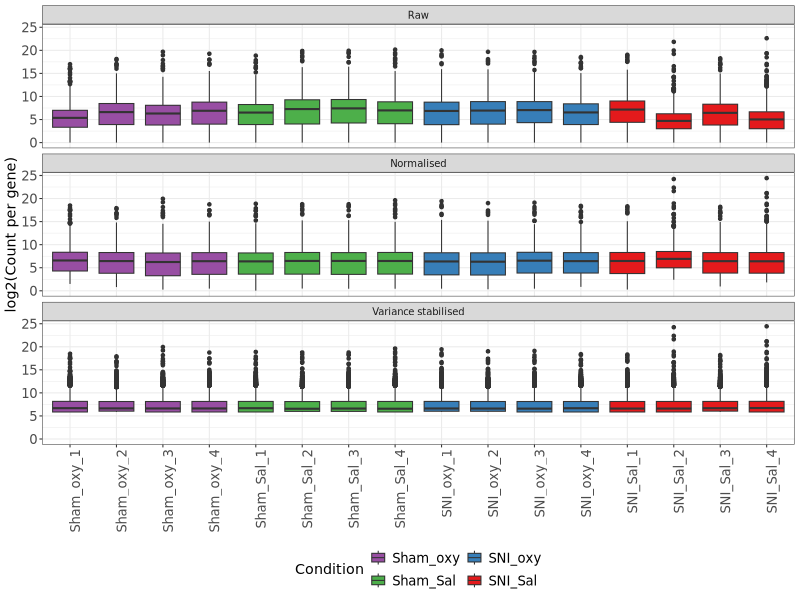

- Looking at the principal components plot, SNI_Sal_2 and SNI_Sal_4 seem to cluster more far away from all other samples: 

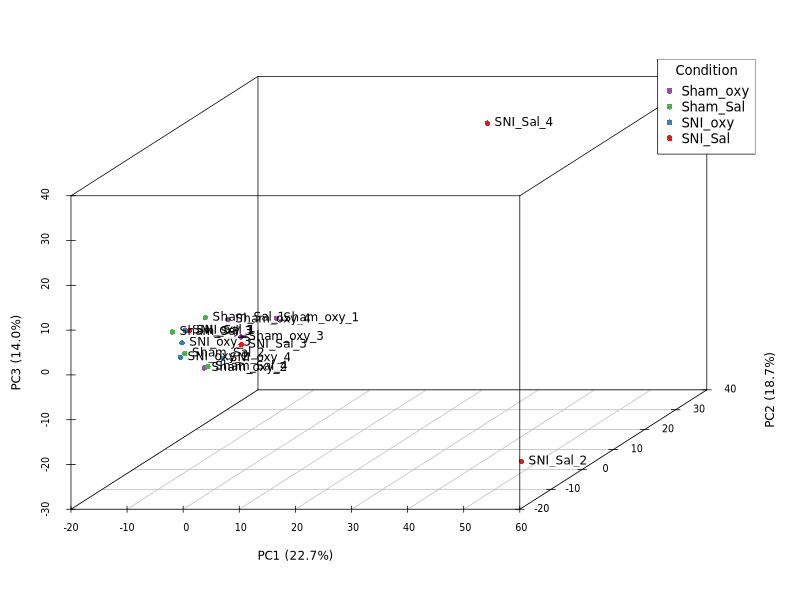

- Taking into account that SNI_Sal_1 and SNI_Sal_3 also appear not very close to each other in the PCA plots, I would not exclude any samples straight away; one could look further into this and test if excluding SNI_Sal_2 and SNI_Sal_4 alters the outcome. 

How many genes were differentially expressed in each contrast? Does this confirm what the paper mentions?

- Contrasting SNI_oxy versus SNI_Sal results in 18 differentially expressed genes
- Contrasting Sham_oxy versus Sham_Sal results in 7 differentially expressed genes

- The paper does not mention numbers of the comparison SNI-oxy versus SNI_Sal
- The publication did compare Sham_oxy to Sham_Sal, reporting: "The Sham-Oxy condition altered 2,609 genes in the NAc, 1,449 genes in the mPFC and 584 genes in the VTA as compared to Sham-Sal controls"
- The number of DEGs in the paper and in our analysis are significantly different!

The paper mentions differentially expressed genes in three brain regions : the NAc, mPFC and VTA. Briefly explain what these 3 regions are.

- NAc (Nucleus Accumbens): area of the hypothalamus; processes reward & reinforcement and aversion behaviour and slow-wave sleep and is clinically significant in addiction because of altered gene transcription in this area while chronic drug use

- mPFC (Medial Prefrontal Cortex): part of the prefrontal cortex; regulates decision-making, emotional responses, and behaviour control, is connected to addiction because of its role in craving, impulse regulation, and relapse

- VTA (Ventral Tegmental Area): midbrain structure; major source of dopamine involved in reward & reinforcement, and is significant to addiction because of its role in driving drug-seeking behaviour and reinforcing drug use


Is there anyway from the paper and the material and methods for us to know which genes are included in these regions?

- Apart from the gene names listed examplary in Figure 4, the paper does not mention gene names
- Since the methods section does not provide enough information on how to reproduce the analysis exactly, redoing the analysis exactly as described does not necessarily have to lead to the same gene names

Once you have your list of differentially expressed genes, do you think just communicating those to the biologists would be sufficient? What does the publication state?

- It would be more helpful to communicate not only which genes are differentially expressed, but also the metadata on the fold changes, significance thresholds, p-values, ...
- If any samples were excluded and why / or why not could also help the biologists on better understanding and placing the results into context
- Any further analysis work which can be done with bioinformatics and would be helpful for the project, f.e. pathway enrichment analysis

- The publication does further work in the bioinformatics analysis than just listing the gene names:
    - they perform pathway and upstream regulator analysis
    - they identify HDAC1/HDAC2 as upstream regulators (which can then be tested)


Please reproduce the Venn Diagram from Figure 3, not taking into account the brain regions but just the contrasts mentionned.

c:\Users\ulrik\miniconda3\envs\workflows_SS25_env\Lib\site-packages\matplotlib_venn\_util.py:32: UserWarning: venn2_unweighted is deprecated. Use venn2 with the appropriate layout_algorithm instead.
  warnings.warn(


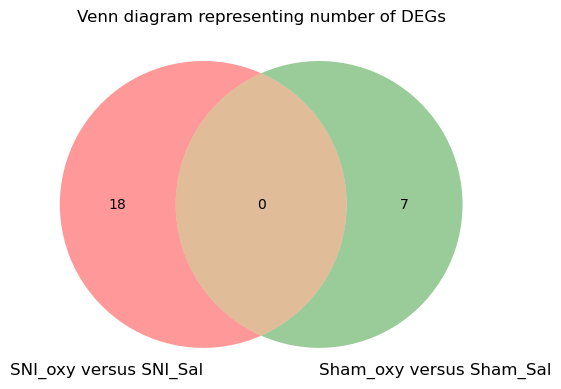

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted

df1 = pd.read_csv("condition_control_treated.deseq2.results_filtered.tsv", sep="\t")
df2 = pd.read_csv("condition_control_treated_test.deseq2.results_filtered.tsv", sep="\t")

genes1 = set(df1["gene_id"])
genes2 = set(df2["gene_id"])

plt.figure(figsize=(6,6))
venn2_unweighted([genes1, genes2], set_labels=("SNI_oxy versus SNI_Sal", "Sham_oxy versus Sham_Sal"))

plt.title("Venn diagram representing number of DEGs")
plt.show()
